# Getting Data: Web & Text
### Gabriel Becton


Today we will be looking at scraping data from websites that have no API and work with manipulating text data.

## Extracting tables from websites using Pandas

Yes it is true, Pandas can do just about everything.  We will use a Pandas function that can read information from websites that is stored in tables.

### The Website: Box Office Mojo

[boxofficemojo.com](https://www.boxofficemojo.com) contains a wealth of information on the performance of movies during their theater runs.  We will practice extracting some of the information from the tables hosted on the site.

**First!** We need to check to see if the site has any policies against scraping and automated access.  Let us check their [robots.txt](https://www.boxofficemojo.com/robots.txt) file.  Click on the link and take a look.  It seems that automated data collection is allowed in all regions of the website.

Now we will select a data table.  Let us look at the top movies for the weekend of January 3-5, 2020 (the first weekend in January)

https://www.boxofficemojo.com/weekend/2020W01/

You should do the following.

1. Click on the link and inspect the contents of the page.
2. While on the page, look at the structure of the HTML that is used to format the data table.  You can see the HTML of any page by inspecting the page source.  The exact way you do this depends on your browser, in Chrome it is: Click on the View menu, then Developer, then View Source.

Ok, now let's go get that data!

In [ ]:
import pandas as pd

tables = pd.read_html("https://www.boxofficemojo.com/weekend/2021W01/")

`tables` is a list of tables from the page.  Let's see how many there are.

In [ ]:
len(tables)

1

Let's see what data is in each table.

In [ ]:
for t in tables:
    display(t.head())

,Rank,LW,Release,Gross,%± LW,Theaters,Change,Average,Total Gross,Weeks,Distributor,New This Week,Estimated
0,1,1,Wonder Woman 1984,"$5,429,210",-67.5%,2151,-,"$2,524","$28,438,521",2,Warner Bros.,False,False
1,2,3,The Croods: A New Age,"$2,224,435",+27.4%,1751,+25,"$1,270","$34,558,715",6,Universal Pictures,False,False
2,3,2,News of the World,"$1,690,180",-24.9%,1928,+28,$876,"$5,407,350",2,Universal Pictures,False,False
3,4,4,Monster Hunter,"$1,263,978",+15.2%,1807,-10,$699,"$6,282,381",3,Screen Gems,False,False
4,5,6,Fatale,"$701,561",+6.3%,1183,+15,$593,"$3,089,694",3,Lionsgate,False,False


There is only one table in this case and the one has the data we want.

In [ ]:
movieData = tables[0]

movieData.head()

,Rank,LW,Release,Gross,%± LW,Theaters,Change,Average,Total Gross,Weeks,Distributor,New This Week,Estimated
0,1,1,Wonder Woman 1984,"$5,429,210",-67.5%,2151,-,"$2,524","$28,438,521",2,Warner Bros.,False,False
1,2,3,The Croods: A New Age,"$2,224,435",+27.4%,1751,+25,"$1,270","$34,558,715",6,Universal Pictures,False,False
2,3,2,News of the World,"$1,690,180",-24.9%,1928,+28,$876,"$5,407,350",2,Universal Pictures,False,False
3,4,4,Monster Hunter,"$1,263,978",+15.2%,1807,-10,$699,"$6,282,381",3,Screen Gems,False,False
4,5,6,Fatale,"$701,561",+6.3%,1183,+15,$593,"$3,089,694",3,Lionsgate,False,False


Now we shall take a look at the data by making some scatter plots to investigate relationships between pairs of columns.  First, we can compare **Gross** with **Weeks** to see if new movies make more money than those that have been out for a while. 

Hmm, looking at **Gross**, we can see there are dollar signs in the values given which means that those entries are not just numbers.  This could confuse our plotting routines.

In [ ]:
movieData.dtypes

Rank              int64
LW               object
Release          object
Gross            object
%± LW            object
Theaters          int64
Change           object
Average          object
Total Gross      object
Weeks             int64
Distributor      object
New This Week      bool
Estimated          bool
dtype: object

In [ ]:
# Get rid of dollar signs and commas then cast as a number
movieData["Gross"].replace('[\$,]', '', regex=True, inplace=True)
movieData["Gross"] = movieData["Gross"].apply(pd.to_numeric)

# Do Total Gross too
movieData["Total Gross"].replace('[\$,]', '', regex=True, inplace=True)
movieData["Total Gross"] = movieData["Total Gross"].apply(pd.to_numeric)

movieData.dtypes

Rank              int64
LW               object
Release          object
Gross             int64
%± LW            object
Theaters          int64
Change           object
Average          object
Total Gross       int64
Weeks             int64
Distributor      object
New This Week      bool
Estimated          bool
dtype: object

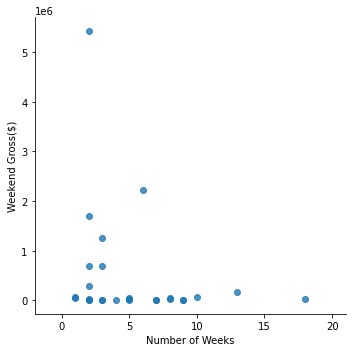

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

sns.lmplot(x='Weeks', y='Gross', data=movieData, fit_reg=False)
ax = plt.gca()
ax.set_xlim(-2, 21)
ax.set_ylabel('Weekend Gross(\$)')
ax.set_xlabel('Number of Weeks');

Now let's look to see if movies that have been out longer make more money overall.

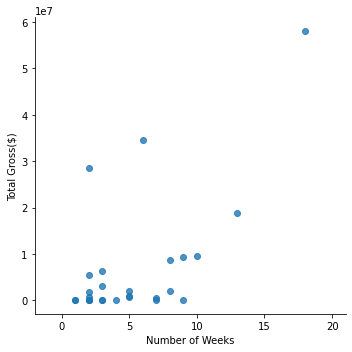

In [ ]:
sns.lmplot(x='Weeks', y='Total Gross', data=movieData, fit_reg=False)
ax = plt.gca()
ax.set_xlim(-2, 21)
ax.set_ylabel('Total Gross(\$)')
ax.set_xlabel('Number of Weeks');

In [ ]:
# TASKS: Repeat the above analysis for the most recent weekend. You can do this by repeating
# the code above, making the appropriate changes or you can just modify the first code cell
# and re-run all the cells to this point.

import pandas as pd

tables1 = pd.read_html("https://www.boxofficemojo.com/weekend/2021W41/?ref_=bo_we_nav")

In [ ]:
#  Read the tables from the web and determine how many tables there are

len(tables1)

1

In [ ]:
#  Read the first table into a dataframe called MovieOct2021 and display the last 5 movies

MovieOct2021 = tables1[0]

MovieOct2021.tail()

,Rank,LW,Release,Gross,%± LW,Theaters,Change,Average,Total Gross,Weeks,Distributor,New This Week,Estimated
44,45,51,Little Girl,$842,-12.4%,5,+1,$168,"$8,679",4,Music Box Films,False,False
45,46,39,The Nowhere Inn,$171,-95.3%,3,-18,$57,"$53,974",4,IFC Films,False,False
46,47,38,Mayday,$144,-96.1%,2,-5,$72,"$4,317",2,Magnolia Pictures,False,False
47,48,53,Swan Song,$131,-68.4%,1,-3,$131,"$126,061",10,Magnolia Pictures,False,False
48,49,54,Ema,$63,+31.2%,1,-,$63,"$52,983",9,Music Box Films,False,False


In [ ]:
#  Get rid of dollar signs and commas from Gross, Average, and Total Gross.  Cast them as numeric

MovieOct2021["Gross"].replace('[\$,]', '', regex=True, inplace=True)
MovieOct2021["Gross"] = MovieOct2021["Gross"].apply(pd.to_numeric)

# Do Total Gross too
MovieOct2021["Total Gross"].replace('[\$,]', '', regex=True, inplace=True)
MovieOct2021["Total Gross"] = MovieOct2021["Total Gross"].apply(pd.to_numeric)

MovieOct2021["Average"].replace('[\$,]', '', regex=True, inplace=True)
MovieOct2021["Average"] = MovieOct2021["Average"].apply(pd.to_numeric)

MovieOct2021.dtypes

Rank              int64
LW               object
Release          object
Gross             int64
%± LW            object
Theaters          int64
Change           object
Average           int64
Total Gross       int64
Weeks             int64
Distributor      object
New This Week      bool
Estimated          bool
dtype: object

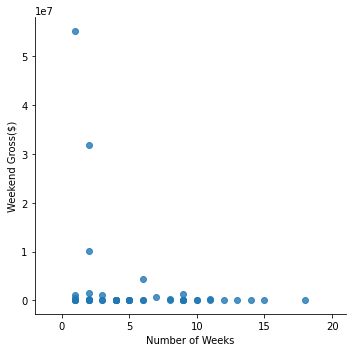

In [ ]:
#  Prepare a scatter plot to compare Gross with Weeks.  
# Comment on the plot i.e. do new movies make more money than those that have been out for a while


%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

sns.lmplot(x='Weeks', y='Gross', data=MovieOct2021, fit_reg=False)
ax = plt.gca()
ax.set_xlim(-2, 21)
ax.set_ylabel('Weekend Gross(\$)')
ax.set_xlabel('Number of Weeks');

From the data above it seems as though the newer the release of the movie the more money it makes. This i shown in the graph by the highest points on the graph being closer to 0 weeks than 5, 10, 15, and 20 weeks.

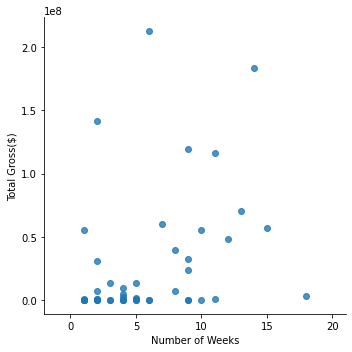

In [ ]:
#  Prepare a scatter plot to compare Total Gross with Weeks.  
#  Comment on the plot i.e do movies that have been out longer make more money overall


sns.lmplot(x='Weeks', y='Total Gross', data=MovieOct2021, fit_reg=False)
ax = plt.gca()
ax.set_xlim(-2, 21)
ax.set_ylabel('Total Gross(\$)')
ax.set_xlabel('Number of Weeks');

From the above data we can conclude that the longer a movie is out the more overall money the movie will mamke.